In [4]:
import os
os.chdir('/Users/DHA/PycharmProjects/Planet/planet_order_63736/20170501_181313_0e1f'); print(os.listdir())
import rasterio
import copy
from xml.dom import minidom

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


['20170501_181313_0e1f_3B_AnalyticMS.tif', '20170501_181313_0e1f_3B_AnalyticMS_DN_udm.tif', '20170501_181313_0e1f_3B_AnalyticMS_metadata.xml', '20170501_181313_0e1f_metadata.json', 'ndvi_cmap.png']


In [6]:
image_file ='20170501_181313_0e1f_3B_AnalyticMS.tif'

with rasterio.open(image_file) as src:
   B, G, R, N = src.read()

In [7]:
xmldoc = minidom.parse("20170501_181313_0e1f_3B_AnalyticMS_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

In [8]:
# Multiply Red and Near-Infrared bands by respective TOA Reflectance coefficients
band_red = R * coeffs[3]
band_nir = N * coeffs[4]

In [9]:
#suppress numpy errors to enable division by zero
np.seterr(divide='ignore',invalid='ignore')

#Compute the Normalized Difference Vegetation Index (NDVI)
# (N-R)/(N+R)
ndvi = (band_nir.astype(float) - band_red.astype(float))/ (band_nir + band_red)

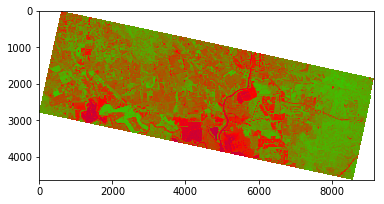

In [10]:
plt.imshow(ndvi,cmap='brg')
plt.clim(-1,1)
matplotlib.pyplot.show()

In [11]:
veg = copy.deepcopy(ndvi)
ndvi_threshold = 0.6
veg[ndvi < ndvi_threshold] = np.nan

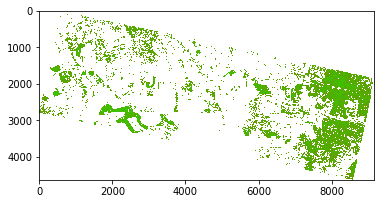

In [12]:
plt.imshow(veg,cmap='brg')
plt.clim(-1,1)
matplotlib.pyplot.show()

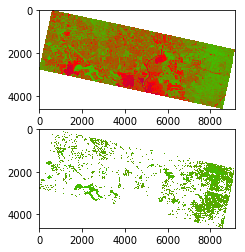

In [13]:
#plot full ndvi image alongside vegetation mask
plt.figure(1)
plt.subplot(211)
plt.imshow(ndvi, cmap = 'brg',clim = [-1,1])
plt.subplot(212)
plt.imshow(veg,cmap = 'brg',clim=[-1,1])
matplotlib.pyplot.show()